In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Untuk memberi tampilan yang menarik
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    GREYBACKBLACK =  '\033[0;30;47m'
    END = '\033[0m'

# Upload Data

In [2]:
#upload data
data = pd.read_csv("D:\Project KI\Data Medical Cost_Regresi.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Informasi Dataset

In [3]:
#menampilkan informasi dataset
print(color.BOLD + "Informasi Dataset"+color.END)
display(data.info())

#menampilkan ukuran dataset
print(color.BOLD + "Ukuran Dataset"+color.END)
print("Baris: ",data.shape[0])
print("Kolom: ",data.shape[1])
print("")

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

Ukuran Dataset
Baris:  1338
Kolom:  7



# Data Cleaning

## 1. Pemeriksaan Missing Value & Data Duplikat

In [4]:
#memeriksa apakah terdapat missing value & duplicate data
print(color.BOLD+"Memeriksa Missing Value"+color.END)
print("Apakah terdapat data yang hilang?",data.isnull().values.any())
print("\nBerikut keterangan jumlah data yang hilang:")
print(data.isnull().sum())
print("\nApakah terdapat data duplikat?",data.duplicated().any())

Memeriksa Missing Value
Apakah terdapat data yang hilang? False

Berikut keterangan jumlah data yang hilang:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Apakah terdapat data duplikat? True


In [5]:
#mencari lokasi data duplikasi
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
#melakukan drop data duplikasi
data.drop_duplicates(inplace=True)

In [7]:
#pengecekan kembali apakah masih terdapat data duplikat
print("\nApakah terdapat data duplikat?",data.duplicated().any())


Apakah terdapat data duplikat? False


## 2. Pemeriksaan Outliers

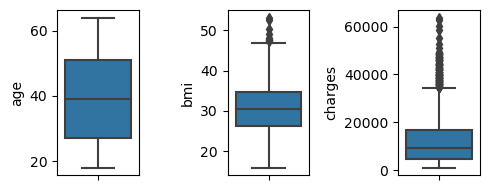

In [8]:
#mendeteksi outliers 
data_outliers = ['age', 'bmi', 'charges']
plt.figure(figsize=(5,2))
for i in range(0,len(data_outliers)):
    plt.subplot(1,len(data_outliers),i+1)
    sns.boxplot(y=data[data_outliers[i]])
    plt.tight_layout()

In [9]:
for i in range(len(data_outliers)):
    Q1 = np.quantile(data[data_outliers[i]], .25)
    Q3 = np.quantile(data[data_outliers[i]], .75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    print("Mendeteksi Outliers pada kolom", color.BOLD+"{0}".format(data_outliers[i])+color.END)
    print("Batas min_IQR: ",min_IQR)
    print("Batas max_IQR: ",max_IQR)
  
    #memeriksa dataset yang menjadi outlier
    outmax=data.loc[data[data_outliers[i]] > max_IQR]
    outmin=data.loc[data[data_outliers[i]] < min_IQR]
    if len(outmax)!=0:
        display(outmax)
    if len(outmin)!=0:
        display(outmin)
    if len(outmax)==0 and len(outmin)==0:
        print("Tidak ada outliers!")
    print("")

Mendeteksi Outliers pada kolom age
Batas min_IQR:  -9.0
Batas max_IQR:  87.0
Tidak ada outliers!

Mendeteksi Outliers pada kolom bmi
Batas min_IQR:  13.674999999999994
Batas max_IQR:  47.31500000000001


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270



Mendeteksi Outliers pada kolom charges
Batas min_IQR:  -13120.716174999998
Batas max_IQR:  34524.777625


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


## 3. Label Encoding Data

In [10]:
#melihat unique value pada kolom dataset
print(data["sex"].unique())
print(data["smoker"].unique())
print(data["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
#using sklearn label encoder
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region) 
data.region = le.transform(data.region)

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## 4. Feature Selection

In [13]:
# feature selection dengan VIF
# VIF (Variance Inflation Factor) checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
pd.set_option('display.max_rows', None)

# column's vif
vif_data.sort_values(by= 'VIF', ascending = False) #batas vif = 11

,feature,VIF
2,bmi,10.472568
0,age,9.250955
6,charges,7.923216
4,smoker,4.008949
5,region,2.950821
1,sex,2.005905
3,children,1.806563


In [14]:
# drop column 'age' (vif > 11)
data.drop(columns = ['age'], inplace = True)

In [15]:
# VIF (Variance Inflation Factor) checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
pd.set_option('display.max_rows', None)

# column's vif
vif_data.sort_values(by= 'VIF', ascending = False) #batas vif = 11

,feature,VIF
5,charges,6.473246
1,bmi,6.337909
3,smoker,3.518327
4,region,2.938133
0,sex,2.000391
2,children,1.798109


In [16]:
# data's columns after feature selection
data.columns

Index(['sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Preprocessing Data

In [17]:
# set X and y
X = data.drop(columns=['charges'])
Y = data['charges']

In [18]:
X = X.to_numpy()
X

array([[ 0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [ 1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [ 1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [ 0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [ 0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [ 0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [19]:
charges = Y.to_numpy()
charges

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Metode ANN-GA

## 1. Model

In [20]:
#import modul yang akan digunakan pada model
import numpy
import pygad
import pygad.nn 
import pygad.gann 

In [21]:
# Function untuk menghitung fitness function
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, problem_type="regression")
    solution_fitness = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))

    return solution_fitness

# Function untuk menjalankan model pada setiap generation
def callback_generation(model):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=model.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generasi = {generation}".format(generation=model.generations_completed))
    print("Fitness    = {fitness}".format(fitness=model.best_solution()[1]))
    print("Change     = {change}".format(change=model.best_solution()[1] - last_fitness))

    last_fitness = model.best_solution()[1].copy()

# inisiasi awal fitness yang kemudian akan menjadi output di akhir generasi
last_fitness = 0

In [22]:
# Numpy array untuk data input
data_inputs = X

# Numpy array untuk data output
data_outputs = charges

# ukuran panjang vektor input untuk data input (jumlah neuron di input layer)
num_inputs = data_inputs.shape[1]

# Membuat inisialisasi populasi dari ANN
num_solutions = 5 
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,     # Banyaknya inisialisasi kromosom berisi bobot dalam suatu populasi
                                num_neurons_input=num_inputs,    # Banyaknya data yang akan diinput
                                num_neurons_hidden_layers=[2],   # Jumlah neuron di 1 hidden layer
                                num_neurons_output=1,            # Jumlah output (yaitu charges)
                                hidden_activations=["None"],     # Fungsi aktivasi di hidden layer adalah linear
                                output_activation="None")        # Fungsi aktivasi di output layer adalah linear

In [23]:
# Mengubah populasi bobot dari bentuk network/jaringan menjadi vektor.
# Jika terdapat 3 bobot di suatu ANN untuk 1 kromosom maka akan dibentuk 1 vektor yang berisi 3 element bobot.
# Merandom nilai gen untuk setiap kromosom bobot
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [24]:
initial_population = population_vectors.copy() # variabel untuk inisiasi populasi bobot

num_parents_mating = 2 # Jumlah solusi yang dipilih untuk menjadi parents

num_generations = 500 # Jumlah generasi

crossoverRate = 0.25  # Probabilitas crossover

mutation_percent_genes = 10 # nilai presentase untuk melakukan mutasi pada gen

parent_selection_type = "rws" # roulette wheel selection

crossover_type = "single_point" # single-point crossover

mutation_type = "random" # random mutation

keep_parents = 0 # Jumlah parents yang disimpan pada populasi selanjutnya. 1 artinya semua parent disimpan
                 # dan 0 artinya tidak ada parent yang disimpan.
    
init_range_low = -1  #Batas bawah nilai gen yang dipilih secara random pada inisial populasi bobot
init_range_high = 1 #Batas bawah nilai gen yang dipilih secara random pada inisial populasi bobot

In [25]:
# Model pada Genetic Algorithm
model = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       crossover_probability = crossoverRate,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

model.run() #running model

Generasi = 1
Fitness    = 7.530811172100662e-05
Change     = 7.530811172100662e-05
Generasi = 2
Fitness    = 7.531075177568308e-05
Change     = 2.640054676459583e-09
Generasi = 3
Fitness    = 7.531125167706383e-05
Change     = 4.999013807478704e-10
Generasi = 4
Fitness    = 7.531137676252928e-05
Change     = 1.2508546545016326e-10
Generasi = 5
Fitness    = 7.531887263333882e-05
Change     = 7.495870809544098e-09
Generasi = 6
Fitness    = 7.531899464145184e-05
Change     = 1.220081130174971e-10
Generasi = 7
Fitness    = 7.532038327285373e-05
Change     = 1.3886314018828798e-09
Generasi = 8
Fitness    = 7.532259969112557e-05
Change     = 2.216418271844007e-09
Generasi = 9
Fitness    = 7.532267155105411e-05
Change     = 7.18599285436626e-11
Generasi = 10
Fitness    = 7.539558704654045e-05
Change     = 7.291549548634065e-08
Generasi = 11
Fitness    = 7.545284008665333e-05
Change     = 5.725304011287326e-08
Generasi = 12
Fitness    = 7.545284008665333e-05
Change     = 0.0
Generasi = 13
Fitn

## 2. Plot Fitness Pada Setiap Iterasi

C:\Users\LATIFAH A ESMANANDA\anaconda3\lib\site-packages\pygad\pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


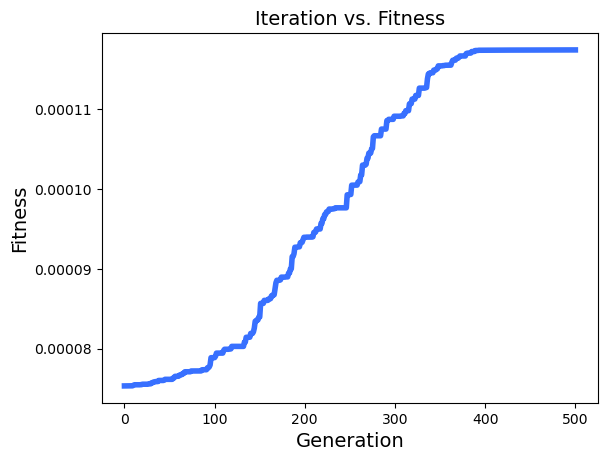

In [26]:
fig = model.plot_result(title="Iteration vs. Fitness", linewidth=4)

## 3. Parameter, Fitness dan Indeks Terbaik

In [27]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = model.best_solution()
print("\nParameter dari solusi terbaik : {solution}".format(solution=solution))
print("\nFitness Value dari solusi terbaik = {solution_fitness}".format(solution_fitness=solution_fitness))
print("\nIndex dari solusi terbaik : {solution_idx}".format(solution_idx=solution_idx))


Parameter dari solusi terbaik : [ 2.02112333  4.80571676  0.19851944  3.8454237   5.5603017   2.85258936
  9.45215803 14.98333684  1.70958272  4.98634607 10.38241687 12.69728064]

Fitness Value dari solusi terbaik = 0.00011745321355246749

Index dari solusi terbaik : 0


## 4. Generasi Dari Fitness Terbaik

In [28]:
if model.best_solution_generation != -1:
    print("Best fitness value didapat setelah {best_solution_generation} generasi.".format(best_solution_generation=model.best_solution_generation))

Best fitness value didapat setelah 497 generasi.


## 5. Perbandingan Prediksi Biaya dan Biaya Aktual

In [29]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                               problem_type="regression")

#buat dataframe berisi prediksi biaya dan biaya aktual
tabel_pred = {'Prediksi Biaya': predictions,
        'Biaya Aktual': charges}
tabel_pred = pd.DataFrame(tabel_pred)
tabel_pred.index += 1

print(color.BOLD+'\nDidapat hasil perbandingan prediksi biaya dengan menggunakan ANN-GA dengan biaya aktual adalah:'+color.END) 

tabel_pred #tampilkan dataframe


Didapat hasil perbandingan prediksi biaya dengan menggunakan ANN-GA dengan biaya aktual adalah:


,Prediksi Biaya,Biaya Aktual
1,[8342.808762672852],16884.924000
2,[10077.743043864633],1725.552300
3,[10043.586453676997],4449.462000
4,[6710.822259439512],21984.470610
5,[8491.592704469822],3866.855200
6,[7587.008371812948],3756.621600
7,[9901.51372822845],8240.589600
8,[8363.620941371697],7281.505600
9,[8871.452704568786],6406.410700
10,[7533.843080164468],28923.136920


## 6. Error Model

In [30]:
# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print("Absolute error : {abs_error}".format(abs_error=abs_error))

Absolute error : 8514.028435273849


**note : MAE tersebut menggunakan satuan harga US Dollar, sesuai dengan dataset. Oleh karena itu, diperoleh nilai MAE yang relatif besar.**


# Contoh Implementasi Model pada Dataset

In [31]:
#Function untuk menghindari input selain angka integer
def check_is_digit(input_str):
    if input_str.strip().isdigit():
        return 1 #Number
    else:
        return 0 #String

In [32]:
baris1 = (input('Masukkan nomor baris yang ingin dilakukan prediksi. Pilih nomor baris data dari 1 sampai 1337: ')) 

if check_is_digit(baris1)==0:
    print("Mohon masukkan angka integer saja!")
else:
    baris1 = int(baris1)
    baris = baris1 - 1
    if baris in range (0, len(tabel_pred)+1):
        print(color.BOLD+'\nBerikut adalah data indeks ke-'+'{}'.format(baris1)+' pada dataframe:'+color.END)
        print(data.iloc[baris])
    elif baris > len(tabel_pred)+1:
        print("Nomor baris data yang dipilih tidak ada di dalam range")
    else:
        print("Nomor baris data yang dipilih tidak ada di dalam range")

Masukkan nomor baris yang ingin dilakukan prediksi. Pilih nomor baris data dari 1 sampai 1337: 2

Berikut adalah data indeks ke-2 pada dataframe:
sex            1.0000
bmi           33.7700
children       1.0000
smoker         0.0000
region         2.0000
charges     1725.5523
Name: 1, dtype: float64


In [33]:
print('\n Didapatkan prediksi biaya klaim asuransi pada data indeks ke-{} dengan menggunakan model ANN-GA adalah: {}'.format(baris,float(predictions[baris])))


 Didapatkan prediksi biaya klaim asuransi pada data indeks ke-1 dengan menggunakan model ANN-GA adalah: 10077.743043864633


In [36]:
print('\n Didapatkan prediksi biaya klaim asuransi pada data indeks ke-2 dengan menggunakan model ANN-GA adalah: 10077.743043864633')


 Didapatkan prediksi biaya klaim asuransi pada data indeks ke-2 dengan menggunakan model ANN-GA adalah: 10077.743043864633


**note : MAE tersebut menggunakan satuan harga US Dollar, sesuai dengan dataset. Oleh karena itu, diperoleh nilai MAE yang relatif besar.**
